# Linear Regression

LR is a type of supervised machine learning algorithm used to predict a continuous numerical value.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel("G:\Data science\Practice dataset\Real estate valuation data set.xlsx")

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.shape

(414, 8)

In [6]:
# checking information about the data like null values, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
# checking the sum of null values
df.isnull().sum()



No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [8]:
# here we delete on column which is not required.
df = df.drop('No', axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
# creating a new column for the target variable.
df['Total_house_price'] = df['X5 latitude'] * df['X6 longitude'] * df['Y house price of unit area']


In [11]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Total_house_price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,115080.976896
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,128123.347552
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,143653.580777
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,166431.632697
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,130853.920041


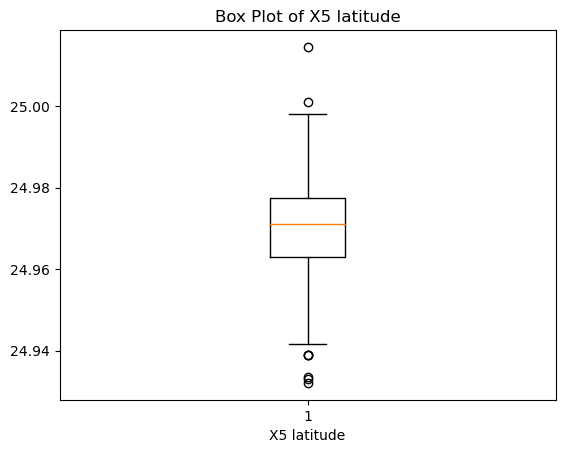

In [12]:
# checking the outliers with the help of box plot.
import matplotlib.pyplot as plt

# Create a box plot
plt.boxplot(df['X5 latitude'])

# Set the title and labels for the plot
plt.title('Box Plot of X5 latitude')
plt.xlabel('X5 latitude')

# Display the plot
plt.show()


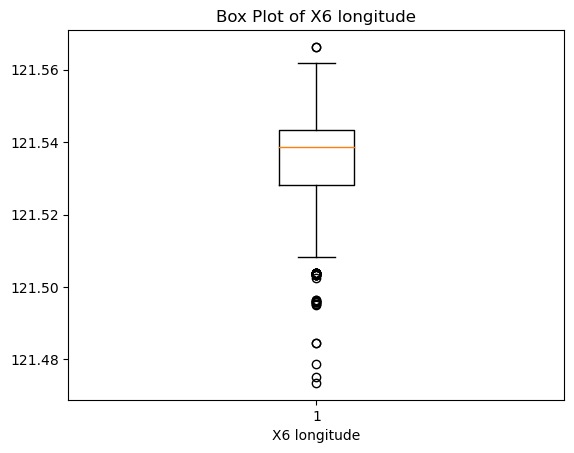

In [13]:
import matplotlib.pyplot as plt

# Create a box plot
plt.boxplot(df['X6 longitude'])

# Set the title and labels for the plot
plt.title('Box Plot of X6 longitude')
plt.xlabel('X6 longitude')

# Display the plot
plt.show()


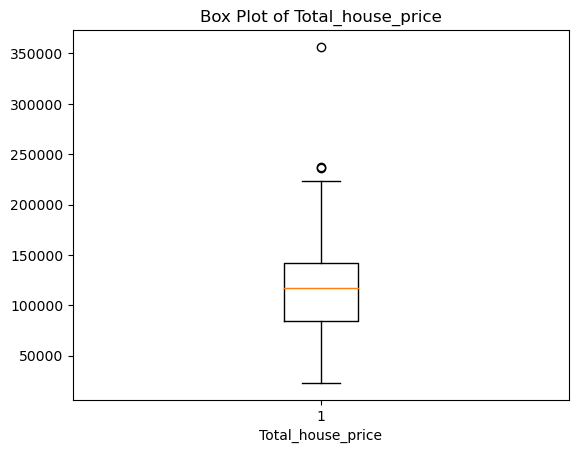

In [14]:
import matplotlib.pyplot as plt

# Create a box plot
plt.boxplot(df['Total_house_price'])

# Set the title and labels for the plot
plt.title('Box Plot of Total_house_price')
plt.xlabel('Total_house_price')

# Display the plot
plt.show()


In [15]:
# removing outiers with the help of IQR method.
Q1 = df[['X5 latitude', 'X6 longitude', 'Total_house_price']].quantile(0.25)
Q3 = df[['X5 latitude', 'X6 longitude', 'Total_house_price']].quantile(0.75)
IQR = Q3 - Q1


In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [17]:
data_no_outliers = df[
    (df['X5 latitude'] >= lower_bound['X5 latitude']) & (df['X5 latitude'] <= upper_bound['X5 latitude']) &
    (df['X6 longitude'] >= lower_bound['X6 longitude']) & (df['X6 longitude'] <= upper_bound['X6 longitude']) &
    (df['Total_house_price'] >= lower_bound['Total_house_price']) & (df['Total_house_price'] <= upper_bound['Total_house_price'])
]


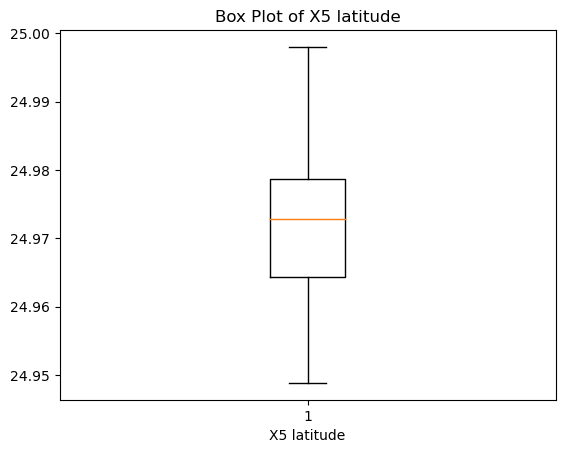

In [18]:
# after removing outliers the checking the model with the help of boxplot.
import matplotlib.pyplot as plt

# Create a box plot
plt.boxplot(data_no_outliers['X5 latitude'])

# Set the title and labels for the plot
plt.title('Box Plot of X5 latitude')
plt.xlabel('X5 latitude')

# Display the plot
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
# drop the y house price of unit area column
df = df.drop('Y house price of unit area', axis=1)

In [21]:

# Extract input features (X) and target variable (y)
#X = data_no_outliers[['X5 latitude', 'X6 longitude']] 
#y = data_no_outliers['Total_house_price']  

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


In [22]:
# Drop the target variable and use rest as input variables
X = data_no_outliers.drop('Total_house_price', axis=1)

# use the salary column as target variable
y = data_no_outliers[['Total_house_price']]

In [23]:
# assign variables for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)

y_pred

array([[ 75213.28942916],
       [ 69458.93410629],
       [212788.47909592],
       [ 94949.36082762],
       [134480.10523581],
       [ 80430.08231633],
       [154173.1413932 ],
       [113830.35919448],
       [141481.47893914],
       [128962.06925626],
       [123226.37000929],
       [163614.95750526],
       [178508.19752205],
       [166953.44189375],
       [106592.49658107],
       [129880.23539528],
       [115080.38855365],
       [160909.44151167],
       [150274.96536885],
       [ 70052.99619088],
       [125656.97906407],
       [ 80670.03975422],
       [111661.63911649],
       [121746.9038917 ],
       [ 99781.50670729],
       [135710.02952658],
       [ 80438.27560536],
       [132908.62716842],
       [123865.28577695],
       [151767.25623975],
       [170616.62162586],
       [145655.70245183],
       [186676.76836121],
       [107760.50335097],
       [ 94953.78643048],
       [166975.47343721],
       [123851.75327323],
       [145403.29366055],
       [ 712

In [26]:
# Calculate the mean squared error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mse

139.1407116350971

In [27]:
from sklearn.metrics import mean_squared_error, r2_score



# Calculate evaluation metrics for the training data
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate evaluation metrics for the testing data
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the evaluation metrics
print("Training MSE:", train_mse)
print("Training R-squared:", train_r2)
print("Testing MSE:", test_mse)
print("Testing R-squared:", test_r2)


Training MSE: 173.96753710743505
Training R-squared: 0.9999998638999121
Testing MSE: 139.1407116350971
Testing R-squared: 0.9999998821255808
